In [2]:
# Import relevant libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2

# import the urllib library
import urllib.request
import os #For checking if a file exists

C:\Users\thuit\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [8]:
# Copy a network object to a local file
spectName="cresSpect1.npy"
waveName="cresWave1.npy"
metaName="cresSpectMeta1.csv"

#Now download the second waveform (time series) and spectrogram files
if not os.path.isfile(waveName):
    urllib.request.urlretrieve('https://www.hep.ucl.ac.uk/undergrad/0056/other/projects/cres/data/'+waveName, waveName)
if not os.path.isfile(spectName):
    urllib.request.urlretrieve('https://www.hep.ucl.ac.uk/undergrad/0056/other/projects/cres/data/'+spectName, spectName)
if not os.path.isfile(metaName):
    urllib.request.urlretrieve('https://www.hep.ucl.ac.uk/undergrad/0056/other/projects/cres/data/'+metaName, metaName)

#This is bad practice to download a file from the web and then load it, but you will just have to trust me.
images=np.load(spectName)
waves=np.load(waveName)
#And read in the meta data
df=pd.read_csv('cresSpectMeta1.csv')
df.describe()

,t0s,f0s,c0s,Ts,eps
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.0
mean,5.120796e-04,2.506795e+07,3.988777e+08,55.454870,1.0
std,2.865034e-04,2.859123e+06,2.883971e+07,14.293135,0.0
min,7.823520e-07,2.000049e+07,3.500662e+08,30.029864,1.0
25%,2.698938e-04,2.271501e+07,3.746986e+08,43.018048,1.0
50%,5.278311e-04,2.510542e+07,3.986082e+08,56.004437,1.0
75%,7.550802e-04,2.750865e+07,4.231338e+08,67.973171,1.0
max,9.996331e-04,2.999923e+07,4.499789e+08,79.947143,1.0


Looking at Event 20
t0s    7.234216e-04
f0s    2.310160e+07
c0s    3.590227e+08
Ts     3.695555e+01
eps    1.000000e+00
Name: 20, dtype: float64
waves.shape (1000, 200000)
images.shape (1000, 600, 100)


Text(0.5, 1.0, 'Event 20, T=37.0K, t0=7.2e-01ms, f0=23.1MHz,c0=0.4MHz/ms ')

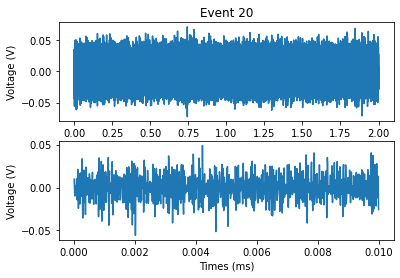

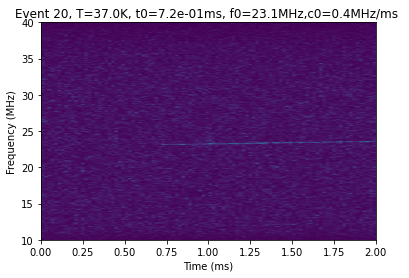

In [10]:
# The times that go with the voltage values
N=len(waves[0]) #200,000 numbers
dt=1e-8 #100MSa/s
dt = dt * 1e3 # Convert seconds to milliseconds
t=np.linspace(0,dt*(N-1),N) #Time array

whichEvent=20


print("Looking at Event {i}".format(i=whichEvent))
print(df.iloc[whichEvent])
print("waves.shape",waves.shape) #1000 events, 200000 numbers per event
print("images.shape",images.shape) #1000 events, 600x100 images 600 frequency bins, 100 time slices


fig,ax = plt.subplots(2,1)
ax[0].plot(t,waves[whichEvent])  # Plot voltage v time
ax[0].set_xlabel("Times (ms)")
ax[0].set_ylabel("Voltage (V)")
ax[0].set_title("Event {ind}".format(ind=whichEvent))
ax[1].plot(t[0:1000],waves[whichEvent][0:1000])  # Zoomed plot voltage v time
ax[1].set_xlabel("Times (ms)")
ax[1].set_ylabel("Voltage (V)")

fig,ax = plt.subplots()
ax.imshow(images[whichEvent],extent=[0,2,10,40],aspect='auto',origin='lower')
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Frequency (MHz)")
titleStr='Event {ind}, T={T:.1f}K, t0={t0:.1e}ms, f0={f0:.1f}MHz,c0={c0:.1f}MHz/ms '.format(
        ind=whichEvent,
        T=df['Ts'][whichEvent],
        t0=df['t0s'][whichEvent]*1e3, #s->ms
        f0=df['f0s'][whichEvent]/1e6, #Hz->MHz
        c0=df['c0s'][whichEvent]/1e9)  #Hz/s  ->Mhz/ms
ax.set_title(titleStr)

# TASK 1:

# Set up the data:

### Set up images

In [3]:
# Cres0
images0=np.load("cresSpect0.npy")
waves0=np.load("cresWave0.npy")
#And read in the meta data
df0=pd.read_csv("cresSpectMeta0.csv")
print('images0 has shape: ', np.shape(images0))

# Cres 1
images1=np.load("cresSpect1.npy")
waves1=np.load("cresWave1.npy")
#And read in the meta data
df1=pd.read_csv("cresSpectMeta1.csv")
print('images1 has shape: ', np.shape(images0))

# Concatenate images
images = np.concatenate((images0, images1), axis=0)
print('total concatenated images array has shape: ', np.shape(images0))

images0 has shape:  (1000, 600, 100)
images1 has shape:  (1000, 600, 100)
total concatenated images array has shape:  (1000, 600, 100)


In [4]:
# Normalise images
normed_images = np.zeros((2000, 600, 100))

for i in range(2000):
    normed_images[i] = images[i]/np.max(images[i])

### Set up labels

In [5]:
# Set up time and freq arrays
t0_array_cres0 = df0['t0s']*1e3
f0_array_cres0 = df0['f0s']/1e6

t0_array_cres1 = df1['t0s']*1e3
f0_array_cres1 = df1['f0s']/1e6



# Concatenate arrays
t0_array = np.concatenate((t0_array_cres0, t0_array_cres1), axis=0)
f0_array = np.concatenate((f0_array_cres0, f0_array_cres1), axis=0)



# Normalise arrays
t0_array_max = np.max(t0_array)
f0_array_max = np.max(f0_array)

t0_array_normalised = t0_array/t0_array_max
f0_array_normalised = f0_array/f0_array_max



# Show shapes of arrays
print('t0 array shape: ', np.shape(t0_array_normalised))
print('f0 array shape: ', np.shape(f0_array_normalised))



# Stack data:
labels = np.stack((t0_array_normalised, f0_array_normalised), axis = 1)
print('Stacked labels shape:', np.shape(labels))

t0 array shape:  (2000,)
f0 array shape:  (2000,)
Stacked labels shape: (2000, 2)


In [6]:
# Shuffle images and labels in case data was not generated completely randomly

# Generate random permutation of indices
indices = np.random.permutation(len(labels))

# Use permutation to shuffle both arrays simultaneously
shuffled_labels = labels[indices]
shuffled_images = normed_images[indices]

### Test to see if data is as expected after manipulation

[0.2543109  0.89360861]


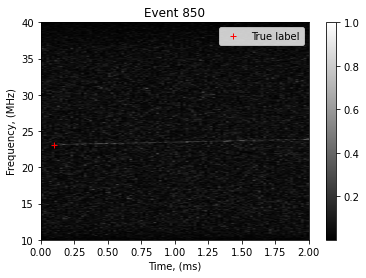

In [7]:
whichEvent = 850

plt.imshow(shuffled_images[whichEvent], extent=[0,2,10,40], aspect='auto', origin='lower', cmap='gray')
plt.plot(shuffled_labels[whichEvent, 0] * t0_array_max, shuffled_labels[whichEvent, 1] * f0_array_max, 'r+', label = 'True label')

plt.title('Event ' + str(whichEvent))
plt.xlabel('Time, (ms)')
plt.ylabel('Frequency, (MHz)')
plt.legend()
plt.colorbar()

print(labels[whichEvent])

### Try a convolutional neural network

In [102]:
num_samples = 1700 # Number of training samples

# Separate the specified number of samples for training
train_labels = shuffled_labels[:num_samples]
train_images = shuffled_images[:num_samples]

# The remaining images and labels are used for validation/testing
val_labels = shuffled_labels[num_samples:]
val_images = shuffled_images[num_samples:]



# Reshape images array to have 3 dimensions (batch_size, height, width, channels)
train_images_reshaped = np.reshape(train_images, (num_samples, 600, 100, 1))
val_images_reshaped = np.reshape(val_images, (len(val_images), 600, 100, 1))



# Define CNN architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(600, 100, 1)),
    keras.layers.Dropout(0.5), # Dropout layer

    keras.layers.Flatten(),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')  # Output layer with 2 neurons
])

# Compile the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

# Print model summary
#model.summary()



history = model.fit(train_images_reshaped, train_labels, epochs=8, batch_size=32,
          validation_data=(val_images_reshaped, val_labels))

Epoch 1/8
54/54 [==============================] - 32s 578ms/step - loss: 0.0605 - accuracy: 0.8447 - val_loss: 0.0502 - val_accuracy: 0.8333
Epoch 2/8
54/54 [==============================] - 31s 569ms/step - loss: 0.0417 - accuracy: 0.8447 - val_loss: 0.0451 - val_accuracy: 0.8333
Epoch 3/8
54/54 [==============================] - 31s 573ms/step - loss: 0.0153 - accuracy: 0.8471 - val_loss: 0.0432 - val_accuracy: 0.8333
Epoch 4/8
54/54 [==============================] - 31s 569ms/step - loss: 0.0069 - accuracy: 0.8653 - val_loss: 0.0463 - val_accuracy: 0.8333
Epoch 5/8
54/54 [==============================] - 31s 567ms/step - loss: 0.0052 - accuracy: 0.9082 - val_loss: 0.0419 - val_accuracy: 0.8333
Epoch 6/8
54/54 [==============================] - 32s 587ms/step - loss: 0.0036 - accuracy: 0.9371 - val_loss: 0.0414 - val_accuracy: 0.8333
Epoch 7/8
54/54 [==============================] - 32s 592ms/step - loss: 0.0031 - accuracy: 0.9571 - val_loss: 0.0413 - val_accuracy: 0.8333
Epoch 

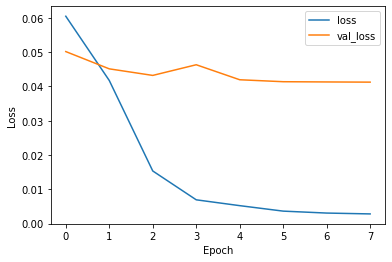

In [103]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [104]:
num_samples = 2000 # Number of prediction samples to test the model

test_images = shuffled_images[:num_samples]
test_images_reshaped = np.reshape(test_images, (num_samples, 600, 100, 1))

prediction = model.predict(test_images_reshaped)

63/63 [==============================] - 5s 76ms/step


In [105]:
# Define function to test data

def visualize_prediction(whichEvent):
    print('Prediction: ', prediction[whichEvent])
    print('Truth value: ', shuffled_labels[whichEvent])
    print(' ') # Space between lines
    print('De-normalised prediction: ', prediction[whichEvent] * [t0_array_max, f0_array_max])
    print('De-normalised truth: ', shuffled_labels[whichEvent] * [t0_array_max, f0_array_max])

    plt.imshow(shuffled_images[whichEvent], cmap='gray', extent=[0,2,10,40], aspect='auto', origin='lower')
    plt.plot(prediction[whichEvent, 0]*t0_array_max, prediction[whichEvent, 1]*f0_array_max, 'g+', label='Predicted value')
    plt.plot(shuffled_labels[whichEvent, 0]*t0_array_max, shuffled_labels[whichEvent, 1]*f0_array_max, 'r+', label='Truth value')
    plt.legend()
    plt.show()

Prediction:  [0.43210575 0.7672773 ]
Truth value:  [0.44651569 0.74462713]
 
De-normalised prediction:  [ 0.4319472  23.01773132]
De-normalised truth:  [ 0.44635185 22.33824364]


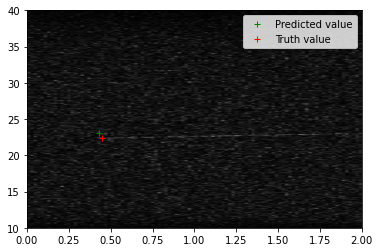

In [106]:
# Test on seen data, i.e. within first 1700 images
visualize_prediction(1200)

Prediction:  [0.4879714  0.78734267]
Truth value:  [0.87136383 0.69491592]
 
De-normalised prediction:  [ 0.48779234 23.61967697]
De-normalised truth:  [ 0.8710441 20.8469452]


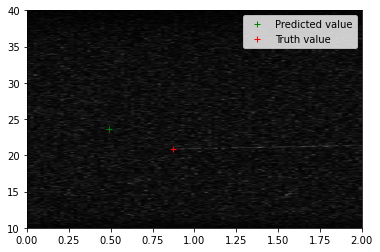

In [107]:
# Test on unseen data (validation images), i.e. after first 1700 images
visualize_prediction(1990)

#### Now find the distance between the predictions and the truth values (while the data is still normalised) to provide an idea of how close the predictions are to the truth values (this is a representation of the accuracy of the model)

In [108]:
# Calculate squared differences between the coordinates
squared_diff = np.sum((prediction - shuffled_labels) ** 2, axis=1)

# Take square root of the sum to get distance
distances = np.sqrt(squared_diff)



print('Mean distance for train data: ', np.mean(distances[:1700]))
print('Standard deviation for train data: ', np.std(distances[:1700]))
print(' ') # Blank line
print('Mean distance for validation data: ', np.mean(distances[1700:]))
print('Standard deviation for validation data: ', np.std(distances[1700:]))

Mean distance for train data:  0.0453105562806639
Standard deviation for train data:  0.0419578036210338
 
Mean distance for validation data:  0.24861720120510863
Standard deviation for validation data:  0.1438176673407557


### Try a non-convolutional neural network

In [130]:
num_samples = 1700 # Number of training samples

# Separate the specified number of samples for training
train_labels = shuffled_labels[:num_samples]
train_images = shuffled_images[:num_samples]

# The remaining images and labels are used for validation/testing
val_labels = shuffled_labels[num_samples:]
val_images = shuffled_images[num_samples:]



# Reshape images array to have 3 dimensions (batch_size, height, width, channels)
train_images_reshaped = np.reshape(train_images, (num_samples, 600, 100, 1))
val_images_reshaped = np.reshape(val_images, (len(val_images), 600, 100, 1))



# Define CNN architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(600, 100, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),  # Add Dropout layer
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.3),  # Add Dropout layer
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.3),  # Add Dropout layer
    keras.layers.Dense(2, activation='linear')  # Output layer with 2 neurons
])

# Compile the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

# Print model summary
#model.summary()



history = model.fit(train_images_reshaped, train_labels, epochs=16, batch_size=32,
          validation_data=(val_images_reshaped, val_labels))

Epoch 1/16
54/54 [==============================] - 5s 80ms/step - loss: 1.0586 - accuracy: 0.7918 - val_loss: 0.0470 - val_accuracy: 0.8333
Epoch 2/16
54/54 [==============================] - 4s 71ms/step - loss: 0.0507 - accuracy: 0.8418 - val_loss: 0.0461 - val_accuracy: 0.8333
Epoch 3/16
54/54 [==============================] - 4s 71ms/step - loss: 0.0533 - accuracy: 0.8447 - val_loss: 0.0445 - val_accuracy: 0.8333
Epoch 4/16
54/54 [==============================] - 4s 70ms/step - loss: 0.0492 - accuracy: 0.8447 - val_loss: 0.0453 - val_accuracy: 0.8333
Epoch 5/16
54/54 [==============================] - 4s 71ms/step - loss: 0.0479 - accuracy: 0.8447 - val_loss: 0.0443 - val_accuracy: 0.8333
Epoch 6/16
54/54 [==============================] - 4s 71ms/step - loss: 0.0475 - accuracy: 0.8447 - val_loss: 0.0445 - val_accuracy: 0.8333
Epoch 7/16
54/54 [==============================] - 4s 72ms/step - loss: 0.0486 - accuracy: 0.8447 - val_loss: 0.0443 - val_accuracy: 0.8333
Epoch 8/16
54

## Create epoch against loss plot

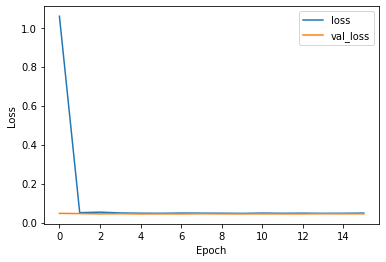

In [131]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [132]:
num_samples = 2000 # Number of prediction samples to test the model

test_images = shuffled_images[:num_samples]
test_images_reshaped = np.reshape(test_images, (num_samples, 600, 100, 1))

prediction = model.predict(test_images_reshaped)

63/63 [==============================] - 1s 7ms/step


In [133]:
# Define function to test data

def visualize_prediction(whichEvent):
    print('Prediction: ', prediction[whichEvent])
    print('Truth value: ', shuffled_labels[whichEvent])
    print(' ') # Space between lines
    print('De-normalised prediction: ', prediction[whichEvent] * [t0_array_max, f0_array_max])
    print('De-normalised truth: ', shuffled_labels[whichEvent] * [t0_array_max, f0_array_max])

    plt.imshow(shuffled_images[whichEvent], cmap='gray', extent=[0,2,10,40], aspect='auto', origin='lower')
    plt.plot(prediction[whichEvent, 0]*t0_array_max, prediction[whichEvent, 1]*f0_array_max, 'g+', label='Predicted value')
    plt.plot(shuffled_labels[whichEvent, 0]*t0_array_max, shuffled_labels[whichEvent, 1]*f0_array_max, 'r+', label='Truth value')
    plt.legend()
    plt.show()

Prediction:  [0.53613144 0.8515412 ]
Truth value:  [0.44651569 0.74462713]
 
De-normalised prediction:  [ 0.53593472 25.5455844 ]
De-normalised truth:  [ 0.44635185 22.33824364]


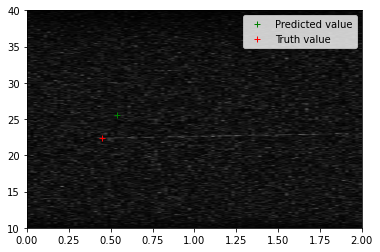

In [134]:
# Test on seen data, i.e. within first 1700 images
visualize_prediction(1200)

Prediction:  [0.53613144 0.8515413 ]
Truth value:  [0.47620448 0.89061573]
 
De-normalised prediction:  [ 0.53593472 25.54558619]
De-normalised truth:  [ 0.47602974 26.71778975]


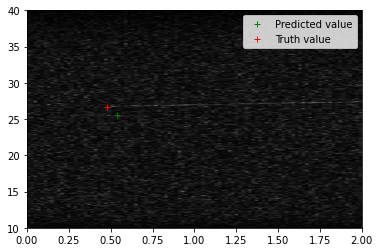

In [135]:
# Test on unseen data (validation images), i.e. after first 1700 images
visualize_prediction(1950)

In [136]:
# Calculate squared differences between the coordinates
squared_diff = np.sum(abs(prediction - shuffled_labels) ** 2, axis=1)

# Take square root of the sum to get distance
distances = np.sqrt(squared_diff)



print('Mean distance for train data: ', np.mean(distances[:1700]))
print('Standard deviation for train data: ', np.std(distances[:1700]))
print(' ') # Blank line
print('Mean distance for validation data: ', np.mean(distances[1700:]))
print('Standard deviation for validation data: ', np.std(distances[1700:]))

Mean distance for train data:  0.272245283014723
Standard deviation for train data:  0.13345761121523167
 
Mean distance for validation data:  0.2662191434269193
Standard deviation for validation data:  0.13665135335034592


#### The convolutional model performs marginally better on the validation data than the dense model, and much better on the training data. However, the convolutional model takes much longer to run. Hence, the dense model can be applied when many images are to be tested, and the convolutional model can be applied when a few imags are to be tested but accuracy is more important.

#### These images are very noisy. Losses could be improved by de-noising the data, as this will improve the prominence of the feature of interest (the long straight line).

# Test de-noising algorithm:

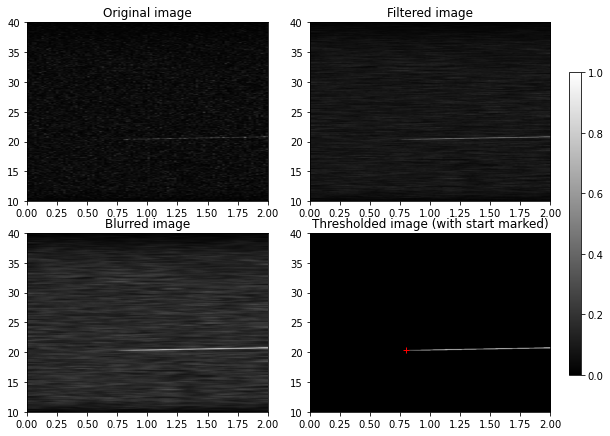

(600, 100)


In [143]:
whichImage = 252

# Convert to numpy array
image = np.array(shuffled_images[whichImage])

kernel_size = 8 
kernel = np.ones((1, kernel_size)) / kernel_size

# Apply filter using cv2.filter2D
filtered_image = cv2.filter2D(image/np.max(image), -1, kernel)

# Apply Gaussian blur
blur_kernel_size = (5, 5) 
blurred_image = cv2.GaussianBlur(filtered_image/np.max(filtered_image), blur_kernel_size, 0)

# Define threshold value
threshold_value = 0.55

# Threshold the image
thresholded_image = np.where(blurred_image/np.max(blurred_image) < threshold_value, 0, blurred_image/np.max(blurred_image))



fig, ax = plt.subplots(2, 2, figsize=(8, 6))
fig.tight_layout()

# Plotting images
im1 = ax[0, 0].imshow(image/np.max(image), cmap='gray', extent=[0,2,10,40], aspect='auto', origin='lower')
ax[0, 0].set_title('Original image')

im2 = ax[0, 1].imshow(filtered_image/np.max(filtered_image), cmap='gray', extent=[0,2,10,40], aspect='auto', origin='lower')
ax[0, 1].set_title('Filtered image')

im3 = ax[1, 0].imshow(blurred_image/np.max(blurred_image), cmap='gray', extent=[0,2,10,40], aspect='auto', origin='lower')
ax[1, 0].set_title('Blurred image')

im4 = ax[1, 1].imshow(thresholded_image/np.max(thresholded_image), cmap='gray', extent=[0,2,10,40], aspect='auto', origin='lower')
ax[1, 1].plot(shuffled_labels[whichImage, 0]*t0_array_max, shuffled_labels[whichImage, 1]*f0_array_max, 'r+')
ax[1, 1].set_title('Thresholded image (with start marked)')

# Create colorbar
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(im4, cax=cbar_ax)

plt.show()



print(np.shape(thresholded_image/np.max(thresholded_image))) # COnfirm final image is still 600 x 100

### De-noise all data:

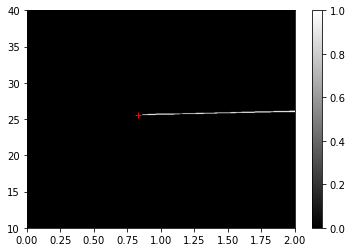

In [185]:
de_noised_images = np.zeros((2000, 600, 100))

for i in range(2000):
    image = np.array(shuffled_images[i])
    kernel_size = 8 
    kernel = np.ones((1, kernel_size)) / kernel_size
    
    filtered_image = cv2.filter2D(image/np.max(image), -1, kernel) # Apply filter using cv2.filter2D
    blur_kernel_size = (5, 5) # Blur size
    blurred_image = cv2.GaussianBlur(filtered_image/np.max(filtered_image), blur_kernel_size, 0) # Apply Gaussian blur
    
    threshold_value = 0.6 # Define threshold value
    thresholded_image = np.where(blurred_image/np.max(blurred_image) < threshold_value, 0, blurred_image/np.max(blurred_image)) # Threshold the image
    
    de_noised_images[i] = thresholded_image/np.max(thresholded_image) # Append and normalise



# Turn every non zero value into 1
de_noised_images[de_noised_images != 0] = 1




# Test an image:
whichImage = 950

plt.imshow(de_noised_images[whichImage], cmap='gray', extent=[0,2,10,40], aspect='auto', origin='lower')
plt.plot(shuffled_labels[whichImage, 0]*t0_array_max, shuffled_labels[whichImage, 1]*f0_array_max, 'r+')
plt.colorbar()

### Test a convolutional neural network:

In [214]:
num_samples = 1700 # Number of training samples

# Separate the specified number of samples for training
train_labels = shuffled_labels[:num_samples]
train_images = de_noised_images[:num_samples]

# The remaining images and labels are used for validation/testing
val_labels = shuffled_labels[num_samples:]
val_images = de_noised_images[num_samples:]



# Reshape images array to have 3 dimensions (batch_size, height, width, channels)
train_images_reshaped = np.reshape(train_images, (num_samples, 600, 100, 1))
val_images_reshaped = np.reshape(val_images, (len(val_images), 600, 100, 1))



# Define CNN architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(600, 100, 1)),
    keras.layers.Dropout(0.5), # Dropout layer

    keras.layers.Flatten(),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')  # Output layer with 2 neurons
])

# Compile the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

# Print model summary
#model.summary()



history = model.fit(train_images_reshaped, train_labels, epochs=8, batch_size=32,
          validation_data=(val_images_reshaped, val_labels))

Epoch 1/8
54/54 [==============================] - 39s 685ms/step - loss: 0.0609 - accuracy: 0.6624 - val_loss: 0.0406 - val_accuracy: 0.8333
Epoch 2/8
54/54 [==============================] - 31s 575ms/step - loss: 0.0396 - accuracy: 0.8494 - val_loss: 0.0384 - val_accuracy: 0.8233
Epoch 3/8
54/54 [==============================] - 31s 577ms/step - loss: 0.0360 - accuracy: 0.8529 - val_loss: 0.0335 - val_accuracy: 0.8333
Epoch 4/8
54/54 [==============================] - 31s 579ms/step - loss: 0.0280 - accuracy: 0.8629 - val_loss: 0.0210 - val_accuracy: 0.8200
Epoch 5/8
54/54 [==============================] - 31s 581ms/step - loss: 0.0114 - accuracy: 0.8965 - val_loss: 0.0090 - val_accuracy: 0.8967
Epoch 6/8
54/54 [==============================] - 31s 579ms/step - loss: 0.0064 - accuracy: 0.9206 - val_loss: 0.0069 - val_accuracy: 0.8833
Epoch 7/8
54/54 [==============================] - 31s 581ms/step - loss: 0.0045 - accuracy: 0.9347 - val_loss: 0.0064 - val_accuracy: 0.8767
Epoch 

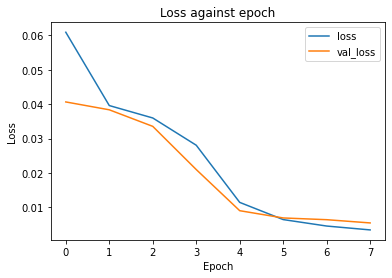

In [215]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Loss against epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [216]:
num_samples = 2000 # Number of prediction samples to test the model

test_images = de_noised_images[:num_samples]
test_images_reshaped = np.reshape(test_images, (num_samples, 600, 100, 1))

prediction = model.predict(test_images_reshaped)

63/63 [==============================] - 5s 80ms/step


In [217]:
# Calculate squared differences between the coordinates
squared_diff = np.sum(abs(prediction - shuffled_labels) ** 2, axis=1)

# Take square root of the sum to get distance
distances = np.sqrt(squared_diff)



print('Mean distance for train data: ', np.mean(distances[:1700]))
print('Standard deviation for train data: ', np.std(distances[:1700]))
print(' ') # Blank line
print('Mean distance for validation data: ', np.mean(distances[1700:]))
print('Standard deviation for validation data: ', np.std(distances[1700:]))

Mean distance for train data:  0.057494431483258834
Standard deviation for train data:  0.039376357088557384
 
Mean distance for validation data:  0.08562477806758204
Standard deviation for validation data:  0.05926450274103437


In [218]:
# Define function to test data

def visualize_prediction(whichEvent):
    print('Prediction: ', prediction[whichEvent])
    print('Truth value: ', shuffled_labels[whichEvent])
    print(' ') # Space between lines
    print('De-normalised prediction: ', prediction[whichEvent] * [t0_array_max, f0_array_max])
    print('De-normalised truth: ', shuffled_labels[whichEvent] * [t0_array_max, f0_array_max])

    plt.imshow(de_noised_images[whichEvent], cmap='gray', extent=[0,2,10,40], aspect='auto', origin='lower')
    plt.plot(prediction[whichEvent, 0]*t0_array_max, prediction[whichEvent, 1]*f0_array_max, 'g+', label='Predicted value')
    plt.plot(shuffled_labels[whichEvent, 0]*t0_array_max, shuffled_labels[whichEvent, 1]*f0_array_max, 'r+', label='Truth value')
    plt.legend()
    plt.show()

Prediction:  [0.6081378  0.79268116]
Truth value:  [0.62158265 0.78023831]
 
De-normalised prediction:  [ 0.60791464 23.77982758]
De-normalised truth:  [ 0.62135457 23.40655163]


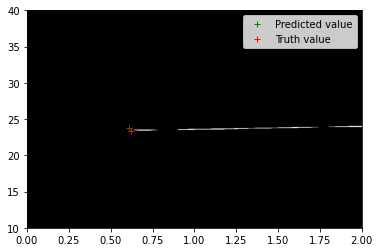

In [219]:
# Test on seen data, i.e. within first 1700 images
visualize_prediction(1000)

Prediction:  [0.6925757 0.8053626]
Truth value:  [0.72980851 0.77892496]
 
De-normalised prediction:  [ 0.69232156 24.1602606 ]
De-normalised truth:  [ 0.72954072 23.36715223]


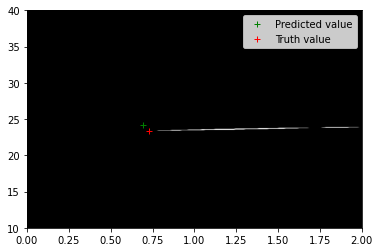

In [220]:
# Test on unseen data (validation images), i.e. after first 1700 images
visualize_prediction(1995)

### Test a non-convolutional neural network:

In [186]:
num_samples = 1700 # Number of training samples

# Separate the specified number of samples for training
train_labels = shuffled_labels[:num_samples]
train_images = de_noised_images[:num_samples]

# The remaining images and labels are used for validation/testing
val_labels = shuffled_labels[num_samples:]
val_images = de_noised_images[num_samples:]



# Reshape images array to have 3 dimensions (batch_size, height, width, channels)
train_images_reshaped = np.reshape(train_images, (num_samples, 600, 100, 1))
val_images_reshaped = np.reshape(val_images, (len(val_images), 600, 100, 1))



# Define CNN architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(600, 100, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),  # Add Dropout layer
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.3),  # Add Dropout layer
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.3),  # Add Dropout layer
    keras.layers.Dense(2, activation='sigmoid')  # Output layer with 2 neurons
])

# Compile the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

# Print model summary
#model.summary()



history = model.fit(train_images_reshaped, train_labels, epochs=16, batch_size=32,
          validation_data=(val_images_reshaped, val_labels))

Epoch 1/16
54/54 [==============================] - 5s 80ms/step - loss: 0.0462 - accuracy: 0.8418 - val_loss: 0.0301 - val_accuracy: 0.8333
Epoch 2/16
54/54 [==============================] - 4s 78ms/step - loss: 0.0221 - accuracy: 0.8465 - val_loss: 0.0153 - val_accuracy: 0.8300
Epoch 3/16
54/54 [==============================] - 4s 77ms/step - loss: 0.0132 - accuracy: 0.8594 - val_loss: 0.0143 - val_accuracy: 0.8733
Epoch 4/16
54/54 [==============================] - 4s 78ms/step - loss: 0.0095 - accuracy: 0.8935 - val_loss: 0.0121 - val_accuracy: 0.8467
Epoch 5/16
54/54 [==============================] - 4s 77ms/step - loss: 0.0072 - accuracy: 0.9141 - val_loss: 0.0101 - val_accuracy: 0.8800
Epoch 6/16
54/54 [==============================] - 4s 78ms/step - loss: 0.0064 - accuracy: 0.9200 - val_loss: 0.0091 - val_accuracy: 0.8833
Epoch 7/16
54/54 [==============================] - 4s 78ms/step - loss: 0.0054 - accuracy: 0.9235 - val_loss: 0.0095 - val_accuracy: 0.8833
Epoch 8/16
54

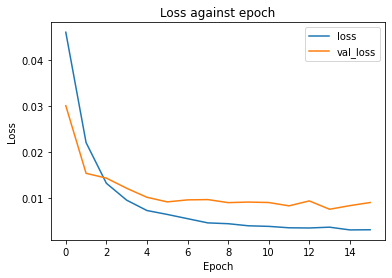

In [213]:
# Epoch loss graph
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Loss against epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [195]:
num_samples = 2000 # Number of prediction samples to test the model, last 300 are unseen data

test_images = de_noised_images[:num_samples]
test_images_reshaped = np.reshape(test_images, (num_samples, 600, 100, 1))

prediction = model.predict(test_images_reshaped)

63/63 [==============================] - 1s 9ms/step


In [196]:
# Calculate squared differences between the coordinates
squared_diff = np.sum(abs(prediction - shuffled_labels) ** 2, axis=1)

# Take square root of the sum to get distance
distances = np.sqrt(squared_diff)



print('Mean distance for train data: ', np.mean(distances[:1700]))
print('Standard deviation for train data: ', np.std(distances[:1700]))
print(' ') # Blank line
print('Mean distance for validation data: ', np.mean(distances[1700:]))
print('Standard deviation for validation data: ', np.std(distances[1700:]))

Mean distance for train data:  0.057507768171939234
Standard deviation for train data:  0.03197708832977472
 
Mean distance for validation data:  0.11169358010676404
Standard deviation for validation data:  0.07391530776419182


# Visualize the predictions:

In [201]:
# Define function to test data

def visualize_prediction(whichEvent):
    print('Prediction: ', prediction[whichEvent])
    print('Truth value: ', shuffled_labels[whichEvent])
    print(' ') # Space between lines
    print('De-normalised prediction: ', prediction[whichEvent] * [t0_array_max, f0_array_max])
    print('De-normalised truth: ', shuffled_labels[whichEvent] * [t0_array_max, f0_array_max])

    plt.imshow(de_noised_images[whichEvent], cmap='gray', extent=[0,2,10,40], aspect='auto', origin='lower')
    plt.plot(prediction[whichEvent, 0]*t0_array_max, prediction[whichEvent, 1]*f0_array_max, 'g+', label='Predicted value')
    plt.plot(shuffled_labels[whichEvent, 0]*t0_array_max, shuffled_labels[whichEvent, 1]*f0_array_max, 'r+', label='Truth value')
    plt.legend()
    plt.show()

Prediction:  [0.6409435 0.7576197]
Truth value:  [0.62158265 0.78023831]
 
De-normalised prediction:  [ 0.64070834 22.72801008]
De-normalised truth:  [ 0.62135457 23.40655163]


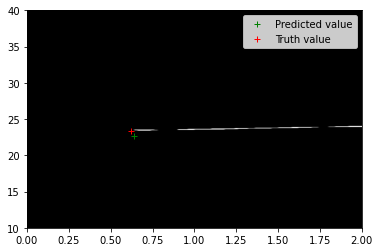

In [210]:
# Test on seen data, i.e. within first 1700 images
visualize_prediction(1000)

Prediction:  [0.6692513 0.7356129]
Truth value:  [0.72980851 0.77892496]
 
De-normalised prediction:  [ 0.66900575 22.06782443]
De-normalised truth:  [ 0.72954072 23.36715223]


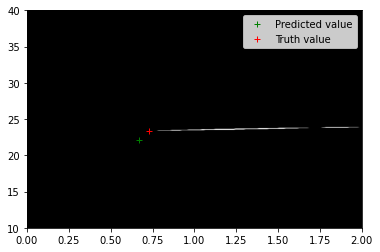

In [209]:
# Test on unseen data (validation images), i.e. after first 1700 images
visualize_prediction(1995)

#### In this case, the convolutional model does better than the dense model. This is because the fine feature in the data has been augmented. However, the dense model runs significantly faster, and still produces good results. Hence, the convolutional model should be used in cases where high accuracy is required, and the dense model in cases where very large numbers of images need to be tested, as the dense model runs significantly faster.

#### The increase in performance when the data are de-noised clearly demonstrates that if the noise temperature is smaller, the accuracy is greater. However, the de-noising algorithm works much better on data where the chirp slope is very gentle, as the Sobel filter enhances horizontal lines the most strongly. Hence, when the slope is steeper, there are often gaps in the line. This likely affects model performance.